# EXAMEN FINAL - PAULINA VERA
Escoja un data set el cual puede descargar de internet o escoger de la lista de data set de seaborn


In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler # Z-score
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")

In [7]:
#Para el analisis se elegio el DataSet de Seaborn "tips"
propinas = sns.load_dataset("tips")
propinas

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Primera parte 

"Tips" Es un conjunto de datos que muestra información sobre propinas dejadas en un restaurante, 
con información sobre el día en el que se produjo, si fue en el almuerzo o la cena, 
el número de comensales, el sexo de la persona que dejó la propina, si era fumador o no.


In [17]:
#Para el analisis univariado se tomó la variable "tip"
propinas['tip'].mean()#promedio de propinas

2.9982786885245902

In [16]:
propinas['tip'].median()#mediana de propinas

2.9

In [15]:
propinas['tip'].mode()#moda en propinas

0    2.0
dtype: float64

En este caso coinciden la media y la mediana por lo que la muestra es homogenea y la distribucíon es normal.
El promedio de propinas en el restaurant es de 2,99 USD y la propina que más se repite es la de los 2 USD.

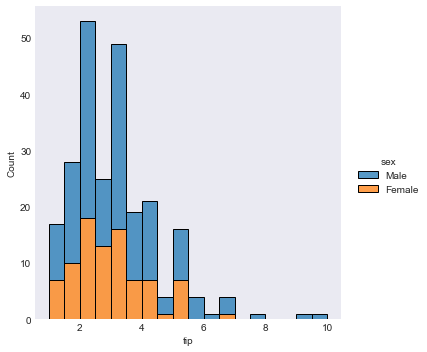

In [26]:
#Para complementar el analisis se busca establecer si hay diferencia según el sexo de la persona que dejó la propina 
sns.displot(propinas, x='tip', hue='sex', multiple='stack')
plt.show()


In [29]:
#Promedio según sexo femenino
fem_df = propinas[(propinas['sex']=='Female') ]
fem_df['tip'].mean()

2.833448275862069

In [30]:
#Promedio según sexo masculino
male_df = propinas[(propinas['sex']=='Male') ]
male_df['tip'].mean()

3.0896178343949052

Se puede concluir que los hombres dejan en promedio 0,26 USD más que las mujeres 

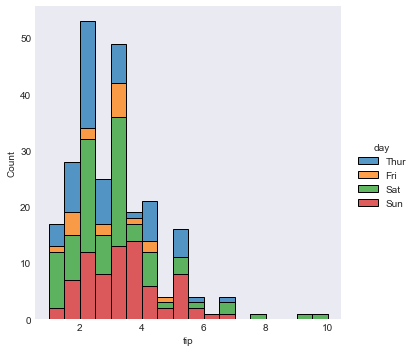

In [31]:
#Para complementar el analisis se busca establecer que día se reciben más y/o mejores propinas 
sns.displot(propinas, x='tip', hue='day', multiple='stack')
plt.show()

In [35]:
#Promedio propinas por día
thur_df = propinas[(propinas['day']=='Thur') ]
thur_df['tip'].mean()

2.771451612903226

In [36]:
fri_df = propinas[(propinas['day']=='Fri') ]
fri_df['tip'].mean()

2.734736842105263

In [38]:
sat_df = propinas[(propinas['day']=='Sat') ]
sat_df['tip'].mean()


2.993103448275862

In [37]:
sun_df = propinas[(propinas['day']=='Sun') ]
sun_df['tip'].mean()


3.255131578947369

Se puede establecer que el día con mayor cantidad de comensales es el día martes.
El día que se reciben, en promedio, mejores propinas es el día domingo 

# Segunda Parte

In [49]:
# Desviación Estandar, minimo,máximo
desv_std = propinas['tip'].std()
minimo = propinas['tip'].min()
maximo = propinas['tip'].max()
print("Desviación standar=",desv_std,",Valor mínimo=",minimo,",Valor máximo=",maximo)

Desviación standar= 1.3836381890011826 ,Valor mínimo= 1.0 ,Valor máximo= 10.0


In [46]:
#Calculo del rango
rango = maximo - minimo
rango

9.0

In [50]:
#Ahora calculamos el rango intercuartil
Q1 = propinas['tip'].quantile(q=0.25)
Q3 = propinas['tip'].quantile(q=0.75)
iqr=Q3-Q1

minlimit = Q1 - 1.5 * iqr
maxlimit = Q3 + 1.5 * iqr

print(minlimit,maxlimit)

-0.34375 5.90625


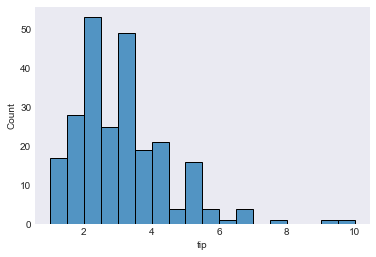

In [51]:
sns.histplot(propinas, x='tip')
plt.show()

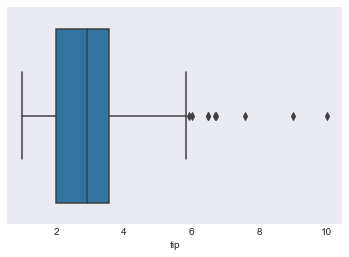

In [53]:
sns.boxplot(x=propinas['tip'])
plt.show()

In [56]:
#Asimetría 
asimetria = ss.skew(propinas['tip'])
asimetria

1.4564266884221506

Conclusiones:
- A pesar de tener mediana y promedio iguales, la distribución no sería normal sino que asimétrica, pues el valor límite mínimo resultó ser un valor negativo. Para complementar el analisis se usó la función skew de SciPy para determinar simetría de la distribución, dando como resultado un numero mayor a 0, lo que indica que es una distribución asimetrica positiva o con cola a la derecha.
- El Q1 esta alejado de la mediana y los datos fuera de rango se encuentra a la derecha del gráfico, lo que tambien indica una asimetria con cola a la derecha.
- Los datos se concentran entre 0 y 6 USD de propina. 

# TERCERA PARTE

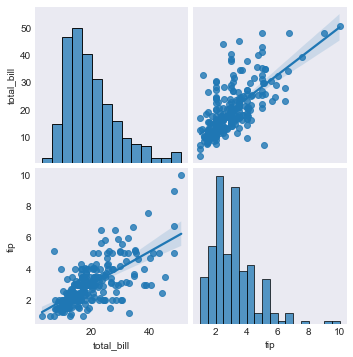

In [96]:
#Se busca establecer si existe una correlación entre el total de la cuenta y la propina
relacion = propinas.loc[:,["total_bill","tip"]] 
sns.pairplot(relacion, kind="reg");#establecer normalidad de los datos

Como se puede apreciar en el gráfico, las variables son cuantitativas, no siguen una distribución normal y poseen outlier, por lo que para determinar su correlación se debe usar el coeficiente de correlacion de Spearman

In [86]:
#Coef de correlacion de Spearman
relacion_corr = relacion.corr(method='spearman')
relacion_corr

,total_bill,tip
total_bill,1.000000,0.678968
tip,0.678968,1.000000


Ambas variables presentan una correlacion positiva moderada, pues el coef es mayor a 0,5 pero menor a 1. 

In [100]:
#Nivel de Significancia de la correlación
#Hipotesis nula:No existe corrrelacion significativa entre las variables (P-valor > 0,05)
#hipotesis alternativa: Existe corrrelacion significativa entre las variables (P-valor < 0,05)
import pingouin as pg
corr = pg.pairwise_corr(relacion, method='spearman')
corr


,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,total_bill,tip,spearman,two-sided,244,0.678968,"[0.6, 0.74]",2.501158e-34,1.0


Existe corrrelacion significativa entre las variables

In [108]:
#Normalización de la variable X con Z-score
var_x = relacion['total_bill']
# promedio
promedio = var_x.mean()
# desviacion estandar 
desv_estandar = var_x.std()
#Z score
scaled_z = (var_x - promedio) / desv_estandar
scaled_z

0     -0.314066
1     -1.061054
2      0.137497
3      0.437416
4      0.539635
         ...   
239    1.038377
240    0.830568
241    0.323964
242   -0.220833
243   -0.112997
Name: total_bill, Length: 244, dtype: float64

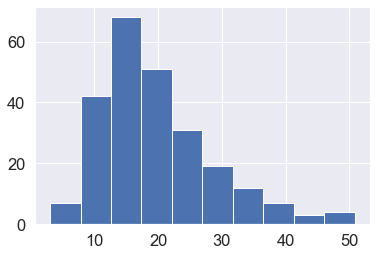

In [109]:
#Grafica sin escalamiento
var_x.hist()
plt.show()

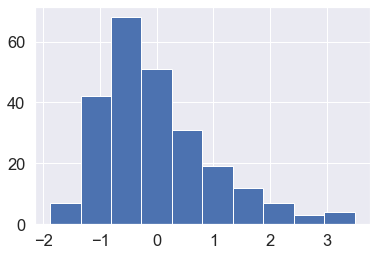

In [104]:
#Gráfica con escalamiento
scaled_z.hist()
plt.show()

Conclusiones:
- Existe una correlación positiva entre las variables cuenta total y propinas, lo que indica que minetras mayor sea el total de la cuenta mayor será la propina.
- Existe un grado de significancia entre las variables, lo que indica que no es una relación al azar relaciona con alguna otra variable como día o tamaño de mesa.
    

# PARTE CUATRO

In [127]:
pinguinos = sns.load_dataset("penguins")
pinguinos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


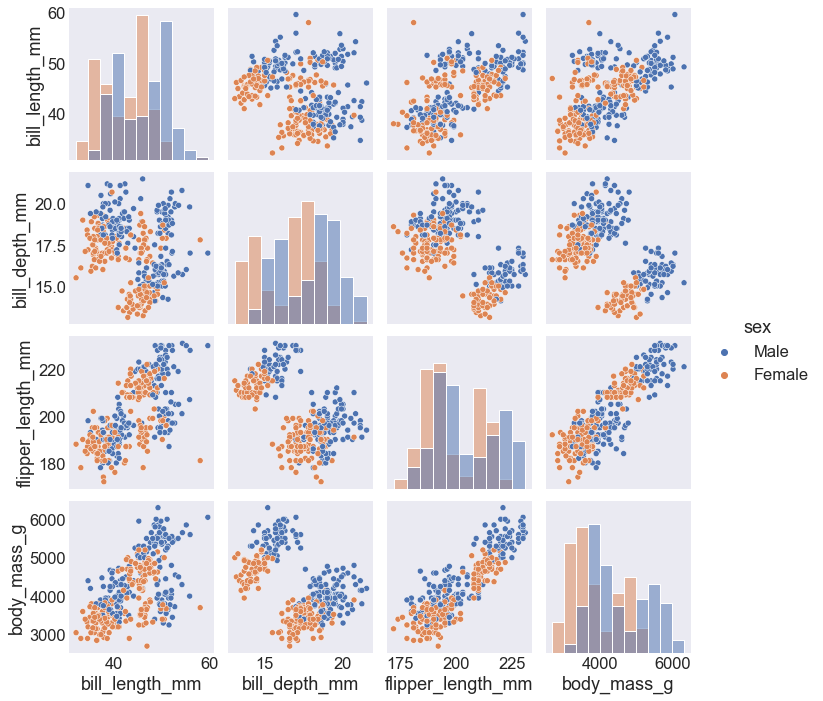

In [129]:
#Para establecer que variables utilizar se hará un plano general según sexo
sns.pairplot(pinguinos, hue="sex", diag_kind="hist")
plt.show()

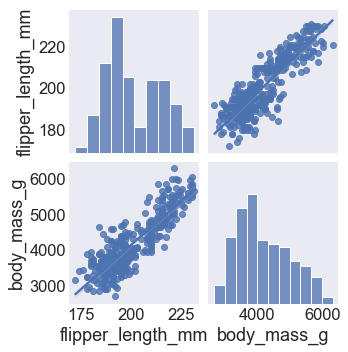

In [136]:
#Variables elegidas peso corporal y longitud de aleta
relacion_pinguinos= pinguinos.loc[:,["flipper_length_mm","body_mass_g"]] 
sns.pairplot(relacion_penguins, kind="reg");

Como se puede apreciar en el gráfico, las variables son cuantitativas, no siguen una distribución normal y poseen outlier, por lo que para determinar su correlación se debe usar el coeficiente de correlacion de Spearman.

In [138]:
#Coef de correlacion de Spearman
relacion_corr2 = relacion_pinguinos.corr(method='spearman')
relacion_corr2

,flipper_length_mm,body_mass_g
flipper_length_mm,1.000000,0.839974
body_mass_g,0.839974,1.000000


Ambas variables presentan una correlacion positiva moderada, pues el coef es mayor a 0,5 pero menor a 1.

In [139]:
#Nivel de Significancia de la correlación
#Hipotesis nula:No existe corrrelacion significativa entre las variables (P-valor > 0,05)
#hipotesis alternativa: Existe corrrelacion significativa entre las variables (P-valor < 0,05)
corr2 = pg.pairwise_corr(relacion_pinguinos, method='spearman')
corr2

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,flipper_length_mm,body_mass_g,spearman,two-sided,342,0.839974,"[0.81, 0.87]",2.763219e-92,1.0


In [ ]:
Existe corrrelacion significativa entre las variables

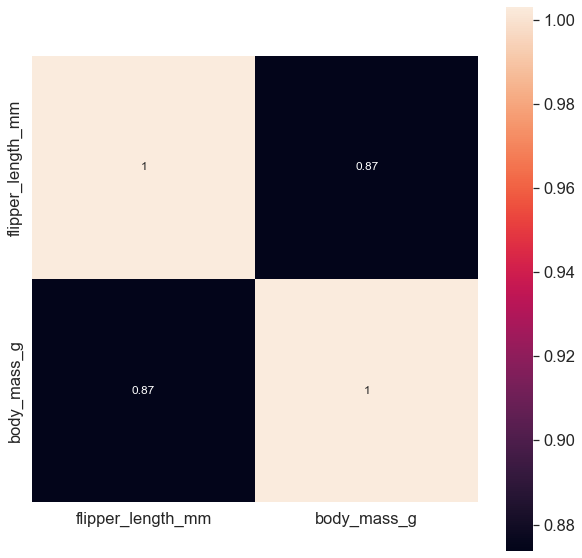

In [137]:
#Matriz de Covarianza
from sklearn.preprocessing import StandardScaler # Z-score
scaler = StandardScaler()
scaled = scaler.fit_transform(relacion_pinguinos[["flipper_length_mm","body_mass_g"]])
scaled = pd.DataFrame(scaled)
scaled = scaled.dropna()
covariance_matrix = np.cov(scaled.T) # Datos Traspuestos
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(covariance_matrix,
                cbar=True,
                annot=True,
                square=True,
                annot_kws={'size':12},
                yticklabels=["flipper_length_mm","body_mass_g"],
                xticklabels=["flipper_length_mm","body_mass_g"]
                )

Conclusiones:
- Existe una correlación positiva entre las variables cuenta total y propinas con una correlación del 87%, lo que indica que mientras más peso del pinguino mayor será el largo de su aleta. 
- Ambas variables tienen un grado de significancia, lo que indica que no es una relación al azar y es una relación habitual entre peso y largo de la aleta.
    
